In [75]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [76]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf 
import os 
import numpy as np

In [77]:
X_train =[]
Y_train =[]

image_size=150

labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in labels:
  folderPath= os.path.join('/content/drive/MyDrive/brain_tumor_classification/Training',i)
  for j in os.listdir(folderPath):
    img =cv2.imread(os.path.join(folderPath, j)) 
    img =cv2.resize(img, (image_size,image_size))
    X_train.append(img)
    Y_train.append(i)

for i in labels:
  folderPath= os.path.join('/content/drive/MyDrive/brain_tumor_classification/Testing',i)
  for j in os.listdir(folderPath):
    img =cv2.imread(os.path.join(folderPath, j))
    img =cv2.resize(img, (image_size, image_size))
    X_train.append(img)
    Y_train.append(i)



X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [78]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)
X_train.shape

# Y_train.shape


(3264, 150, 150, 3)

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [80]:
y_train_new=[]
for i in y_train:
  y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
  y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [81]:
from keras.backend import flatten
model=Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_32 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_34 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [83]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [84]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 13s 101ms/step - loss: 1.7366 - accuracy: 0.2826 - val_loss: 1.3644 - val_accuracy: 0.2789
Epoch 2/20
83/83 [==============================] - 8s 96ms/step - loss: 1.3527 - accuracy: 0.3072 - val_loss: 1.4182 - val_accuracy: 0.2789
Epoch 3/20
83/83 [==============================] - 8s 95ms/step - loss: 1.3304 - accuracy: 0.3307 - val_loss: 1.3577 - val_accuracy: 0.3605
Epoch 4/20
83/83 [==============================] - 8s 97ms/step - loss: 1.1999 - accuracy: 0.4642 - val_loss: 1.1785 - val_accuracy: 0.5034
Epoch 5/20
83/83 [==============================] - 8s 98ms/step - loss: 1.0079 - accuracy: 0.5653 - val_loss: 0.8751 - val_accuracy: 0.6190
Epoch 6/20
83/83 [==============================] - 8s 99ms/step - loss: 0.9131 - accuracy: 0.5948 - val_loss: 0.8258 - val_accuracy: 0.6531
Epoch 7/20
83/83 [==============================] - 8s 97ms/step - loss: 0.8393 - accuracy: 0.6315 - val_loss: 0.8441 - val_accuracy: 0.6327
Epoch 8/20


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

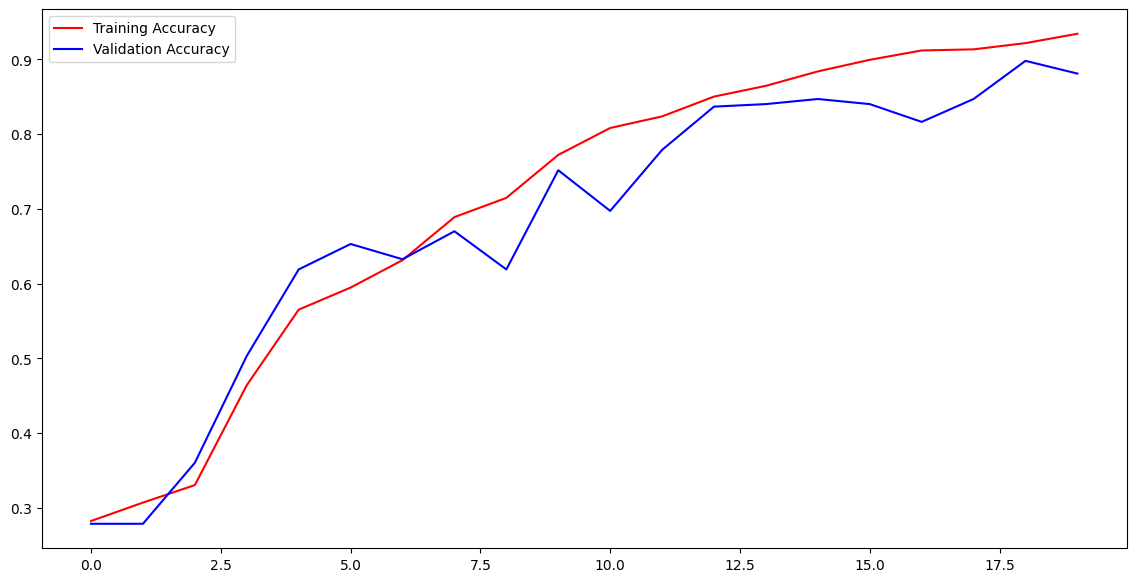

In [86]:
# model.save('brain_tumor_detector.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

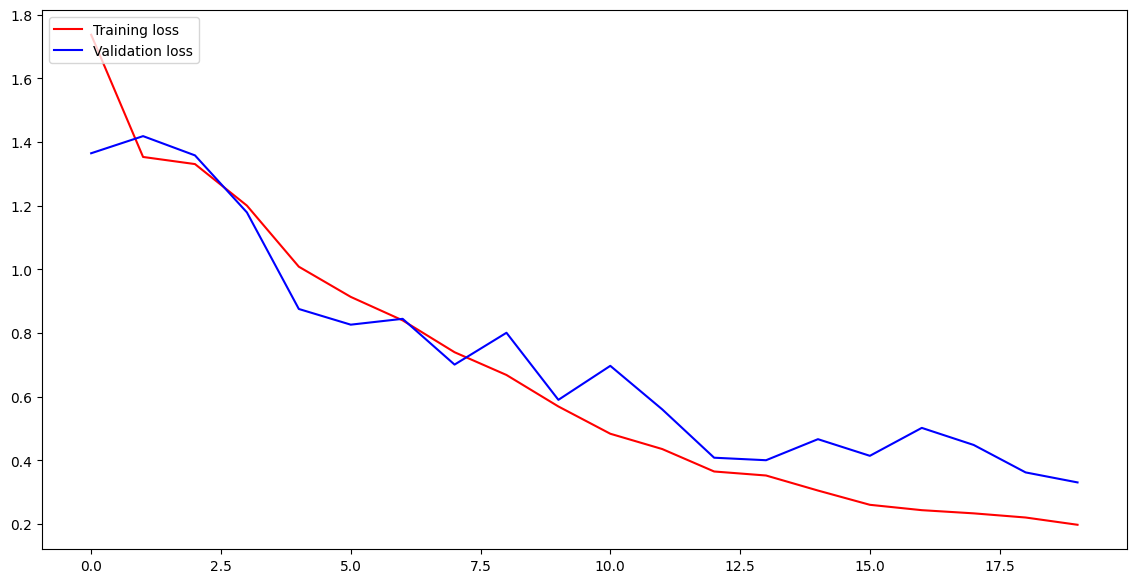

In [87]:


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend(loc='upper left')
plt.show()

In [101]:
img=cv2.imread('/content/drive/MyDrive/brain_tumor_classification/Testing/pituitary_tumor/image(1).jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array.shape

(150, 150, 3)

In [102]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [95]:
# from tensorflow.keras.preprocessing import image
# img=image.load_img('/content/drive/MyDrive/brain_tumor_classification/Training/no_tumor/image (16).jpg')
# plt.imshow(img,interpolation='nearest')
# plt.show()

In [103]:
a=model.predict(img_array)
indices=a.argmax()
indices

1/1 [==============================] - 0s 23ms/step


3

In [92]:
model.save('brain_tumor_detector_my.h5')